# Project Challenge : Marketing Compaign Startegy for Tourism Company


Yang Wang 

3.21-3.22.2017

     Summary
     Data Preprocessing  
     Data Exporation 
     Preparation for Machine Learning 
     Model Training and Selection
     Bussiness Strategy Recommendation 

  - Summary 

 - Data Preprocessing 
 

Data Preprocessing includs tasks of noise eradication, Outlier detection and Missing value check. The project is inspired by the datasets below:

| File Name | Description |
| ------ | ------ |
| sessions.csv --> Session Data | The online log of every web surfer like look up information, changing account profile, tremendous actions recorded.    <br>Features:user_id,action,action_type, action_detail,device_type,secs_elapsed |
| age_gender_bkts.csv --> Age Data | Demographic information of each country in year.          <br>Fetures: age_bucket, country_destination, gender, population_in_thousands, year|
| countries.csv --> Country Data | Geological and language information for each country. <br>Features: country_destination, lat_destination, lng_destination, distance_km, destination_km2	destination_language, language_levenshtein_distance |
| train_users_2 --> Train Data | Account creation and booking history of each user. <br>Features: 	id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser, country_destination  |
| test_users.csv --> Test Data | Potential customers for prediction |

I first approach the Train Data to detect noise data and outlier. From the country_destination column, 11 possible country values are identified. "NDF" is suspicious for the first place, because "NDF" is not appeared in the Country Data. Moreover, all the entries having "NDF" also miss the data_first_booking value, which means the coresponding users never made a book. Hence, we could get rid of all the rows with "NDF" values. After deletion, the number of entries in Train Data decreases to 88908 from 213451. 

Outlier Detection are mainly focused on numerical feature, Age. I replace all the abnormal values and missing values, smaller than 17 or bigger than 80, with the median in Age columns for its robustness.

Gender coloumn exists some unknown values, we leave them as categorical values, since those are not bad data.After a thorogh check, most of categorical features have less the problems of missing value. Then, we can use visulization tools to explore feature characteristics.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
%matplotlib inline  

In [2]:
# plot style collections
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [3]:
%ls

Untitled.ipynb                   case.ipynb
case interview dataset/          methods for missing value.ipynb
case interview dataset.zip


In [4]:
%cd case\ interview\ dataset

/Users/admin/Desktop/launch every day/DAL interview/case study/case interview dataset


In [5]:
sessions_data = pd.read_csv('sessions.csv')
age_gender_data = pd.read_csv('age_gender_bkts.csv')
countries_data = pd.read_csv('countries.csv')
train_data = pd.read_csv('train_users_2.csv')
test_data = pd.read_csv('test_users.csv')

In [80]:
td = train_data
columns = td.columns
features = columns.drop('country_destination')

In [10]:
td.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [81]:
# Get rid of NDF and Other record in dataset
td = td[(td.country_destination != 'NDF') & (td.country_destination != 'other')]

In [85]:
td = td.fillna("unknown")

In [87]:
td = td.replace('-unknown-','unknown')

In [91]:
td.to_csv('cleaned_train')

In [99]:
td.reset_index(inplace=True)


,level_0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,0,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
1,1,4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,unknown,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
2,2,5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,unknown,unknown,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
3,3,6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
4,4,7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [156]:
sum(td.date_first_booking.isnull())

0

In [103]:
del td['index']

In [105]:
td.drop('level_0', 1, inplace=True)

In [155]:
td.age.dtypes(int)

TypeError: 'numpy.dtype' object is not callable

In [144]:
td.to_csv('cleaned_train', index = False)

In [146]:
sessions_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [145]:
clean_train = pd.read_csv('cleaned_train')
clean_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
1,87mebub9p4,2010-09-14,20091208061105,2010-02-18,unknown,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
2,osr2jwljor,2010-01-01,20100101215619,2010-01-02,unknown,unknown,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
3,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
4,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
1,87mebub9p4,2010-09-14,20091208061105,2010-02-18,unknown,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
2,osr2jwljor,2010-01-01,20100101215619,2010-01-02,unknown,unknown,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
3,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
4,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [47]:
# time date conversion
td.date_account_created=pd.to_datetime(td.date_account_created)

In [117]:
age_gender_data.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


Label information

In [48]:
label_name = list(pd.DataFrame(td.country_destination.value_counts()).index)
label_name.pop(0)
label_name

['US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE', 'NL', 'AU', 'PT']

In [49]:
s_len = len(sessions_data.groupby('user_id').size())
s_id = pd.DataFrame(sessions_data.groupby('user_id').size()).index
s_id = list(s_id)
train_id = pd.DataFrame(train_data.groupby('id').size()).index
train_id = list(train_id)
test_id = pd.DataFrame(test_data.groupby('id').size()).index
test_id = list(test_id)
print "total number of test data user: ", len(test_id)
print "total number of whole train data user: ", len(train_id)
print "total number of session data user: ", len(s_id)

total number of test data user:  62096
total number of whole train data user:  213451
total number of session data user:  135483


In [51]:
sessions_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [58]:
td.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [12]:
# NDF have no data_first_booking, make a new train dataset 
NDF_data = td[td.country_destination == 'NDF']
NDF_data.date_first_booking.isnull().sum() == len(NDF_data)


True

In [96]:
# make a new train dataset 
td = td[td.country_destination != 'NDF']
X = td[features]
print "total number of valid user with booking: ", len(X)

total number of valid user with booking:  88908


In [97]:
# drop some features
X.drop(['id','date_account_created','timestamp_first_active','date_first_booking'], 1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
X.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari


 - Data Exploration

In [1]:
# investigate feature gender
US_data = td[td.country_destination=='US']
plot_us_gender = US_data.groupby('gender').size()
number = (plot_us_gender/sum(plot_us_gender) * 100).round(decimals=2)
labels = plot_us_gender.index
sizes = number
explode = [0.1] + list(np.zeros(len(labels)-1)) 

number.plot(kind='pie', explode=explode, labels=labels,
        autopct='%.2f%%', shadow=True, startangle=90, title='US')
plt.axis('equal')
plt.figsize=(8,8)
plt.show()


NameError: name 'td' is not defined

In [17]:
X.age.isnull().sum()

20376

age median:  33


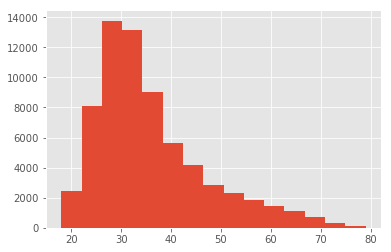

In [111]:
va_age = X.age
va_age = va_age[va_age > 17]
va_age = va_age[va_age < 80]

va_age.hist(bins=15)
median = int(va_age.median())
print "age median: ", median

In [119]:
# replace abnormal age with median
X.loc[X.age < 18, 'age'] = median
X.loc[X.age > 80, 'age'] = median
X.loc[X.age.isnull(), 'age'] = median

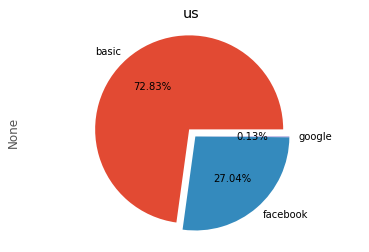

In [120]:
# investigate feature signup_method
X.signup_method.value_counts()
US_data = td[td.country_destination=='US']
plot_us_method = US_data.groupby('signup_method').size()
number = (plot_us_method/sum(plot_us_method) * 100).round(decimals=2)
labels = plot_us_method.index
explode = [0.1] + list(np.zeros(len(labels)-1)) 
number.plot(kind='pie', fontsize=10, explode=explode, autopct='%.2f%%', title='us')
plt.axis('equal')
plt.figsize=(10,10)
plt.show()



In [21]:
X.signup_method.isnull().sum()

0

In [22]:
# s_id occurence in both whole train_data and test_data
# train data id is not in test data
count = 0 
for id in train_id[0:5000]:
    if id in test_id[0:4000]:
        count += 1
print count 

0


In [23]:
# check session_id in NDF, no apperance
count = 0 
for id in s_id:
    if id in NDF_data.id:
        count += 1
print count 

0


In [24]:
# check session_id in valid data
valid_data = td[td.country_destination != 'NDF']
vd_id = valid_data.id

count = 0 
for id in s_id:
    if id in vd_id[100000:150000]:
        count += 1
print count 

0


In [25]:
# convert country categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
td['countries_data'] = number.fit_transform(td.country_destination.astype('str'))
number.fit(td.country_destination.astype('str'))
print "country names: ", number.classes_
print "coresponding country number: ", number.transform(number.classes_)

country names:  ['AU' 'CA' 'DE' 'ES' 'FR' 'GB' 'IT' 'NL' 'PT' 'US' 'other']
coresponding country number:  [ 0  1  2  3  4  5  6  7  8  9 10]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
Y = td.countries_data
assert len(Y) == len(td)

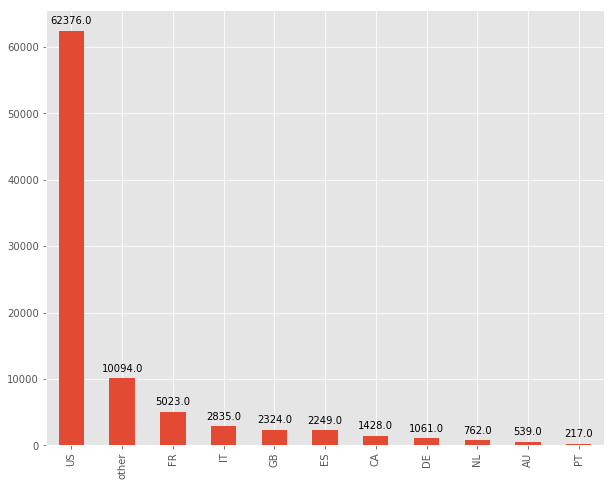

In [33]:
# investigate country destination 
plot_cd = td.country_destination.value_counts()
ax = plot_cd.plot(kind='bar', figsize=(10,8))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

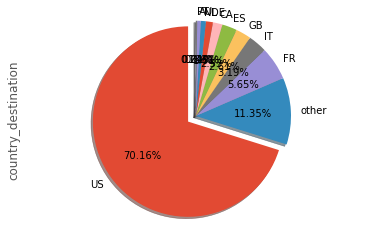

In [34]:
number = (plot_cd/sum(plot_cd) * 100).round(decimals=2)
labels = plot_cd.index
sizes = number
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
number.plot(kind='pie', explode=explode, labels=labels,
        autopct='%.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.figsize=(5,5)
plt.show()


In [35]:
# train set cleaning 
X.groupby('gender').size()

gender
FEMALE    31993
MALE      27721
OTHER       176
dtype: int64

In [36]:
'''
X = X.replace('-unknown-', np.nan)
X.head(120)
X.groupby('gender').size()
'''

gender
FEMALE    31993
MALE      27721
OTHER       176
dtype: int64

In [37]:
# time interval between creating account with booking 
time_interval = pd.to_datetime(X.date_account_created) - pd.to_datetime(X.date_first_booking)
time_interval.value_counts()

AttributeError: 'DataFrame' object has no attribute 'date_account_created'

In [38]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


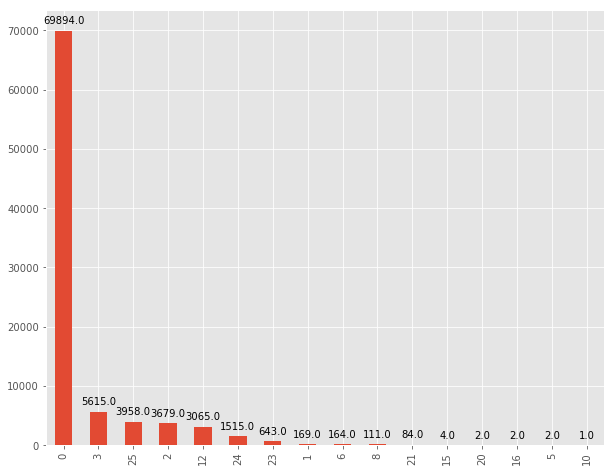

In [39]:
# investigate feature signup_flow
#X.groupby('signup_flow').size().plot(kind='bar')
plot_signup_flow = X.signup_flow.value_counts()
ax = plot_signup_flow.plot(kind='bar', figsize=(10,8))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:

pie_sa = X.signup_app.value_counts()
number = (pie_sa/sum(pie_sa) * 100).round(decimals=2)
labels = pie_sa.index
sizes = number
explode = [0.1] + list(np.zeros(len(pie_sa)-1))
number.plot(kind='pie', fontsize=10, explode=explode, autopct='%.2f%%')
plt.axis('equal')
plt.figsize=(10,10)
plt.show()


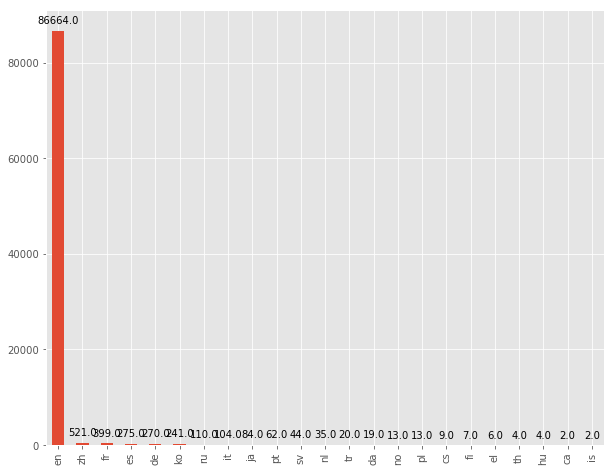

In [40]:
# investigate feature language 
plot_lang = X.language.value_counts()
ax = plot_lang.plot(kind='bar', figsize=(10,8))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [41]:
# no missing value in feature language 
X.language.isnull().sum()

0

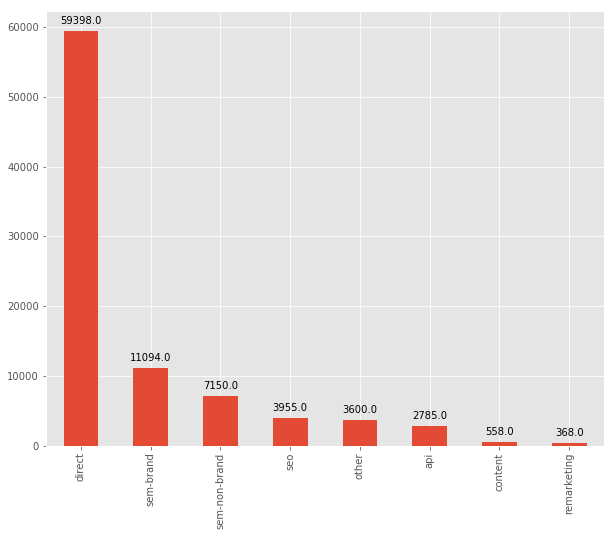

In [42]:
# feature affiliate_chanel 
plot_ac = X.affiliate_channel.value_counts()
ax = plot_ac.plot(kind='bar', figsize=(10,8))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [43]:
X.affiliate_channel.isnull().sum()

0

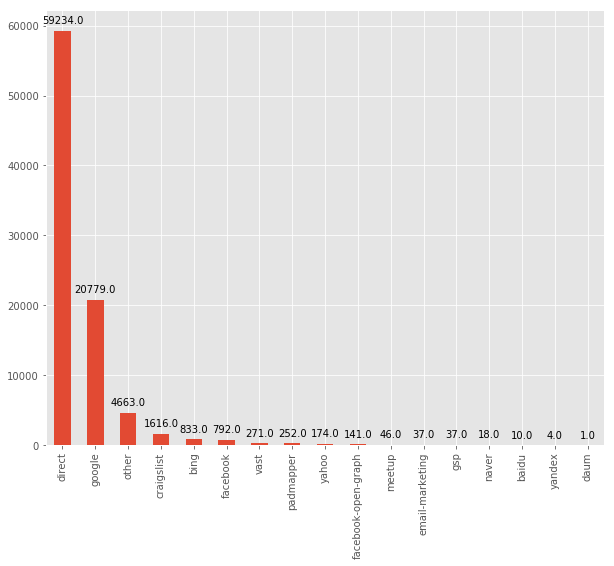

In [44]:
plot_ap = X.affiliate_provider.value_counts()
ax = plot_ap.plot(kind='bar', figsize=(10,8))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [45]:
X.affiliate_provider.isnull().sum()

0

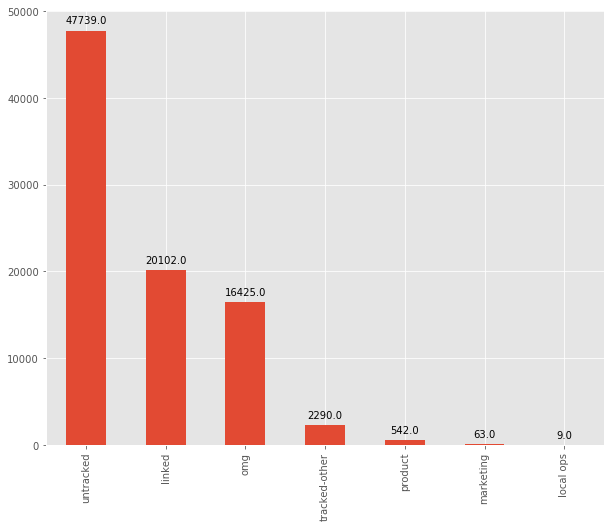

In [238]:
plot_at = X.first_affiliate_tracked.value_counts()
ax = plot_at.plot(kind='bar', figsize=(10,8))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [239]:
plot_at

untracked        47739
linked           20102
omg              16425
tracked-other     2290
product            542
marketing           63
local ops            9
Name: first_affiliate_tracked, dtype: int64

In [47]:
# 1738 missing values in feature first_affiliate_tracked 
X.first_affiliate_tracked.isnull().sum()

1738

In [48]:
# When first_affiliate_tracked missing, first_device_type and first_browser are also missing 
#X[X.first_affiliate_tracked.isnull()]

In [49]:
pie_sa = X.signup_app.value_counts()
pie_sa

Web        80021
iOS         5511
Moweb       2143
Android     1233
Name: signup_app, dtype: int64

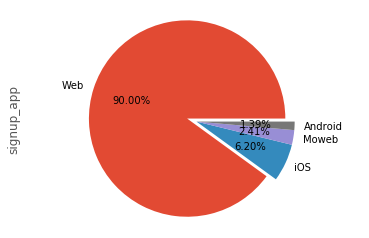

In [50]:
# Investigate signup app
pie_sa = X.signup_app.value_counts()
number = (pie_sa/sum(pie_sa) * 100).round(decimals=2)
labels = pie_sa.index
sizes = number
explode = [0.1] + list(np.zeros(len(pie_sa)-1))
number.plot(kind='pie', fontsize=10, explode=explode, autopct='%.2f%%')
plt.axis('equal')
plt.figsize=(10,10)
plt.show()


In [51]:
# no missing value for feature signup_app
X.signup_app.isnull().sum()

0

In [52]:
X.first_device_type.value_counts()

Mac Desktop           42250
Windows Desktop       30152
iPhone                 6417
iPad                   5464
Other/Unknown          2875
Android Phone           715
Desktop (Other)         550
Android Tablet          460
SmartPhone (Other)       25
Name: first_device_type, dtype: int64

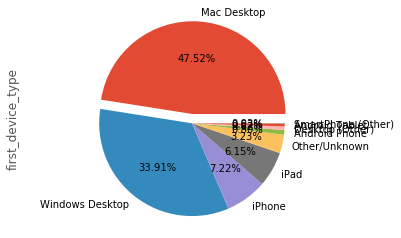

In [53]:
# Investigate feature fist_device_type
pie_fd = X.first_device_type.value_counts()
number = (pie_fd/sum(pie_sa) * 100).round(decimals=2)
# The slices will be ordered and plotted counter-clockwise.
labels = pie_fd.index
sizes = number
explode = [0.1] + list(np.zeros(len(pie_fd)-1))
number.plot(kind='pie', fontsize=10, explode=explode, autopct='%.2f%%')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()


In [54]:
#
X.first_device_type.isnull().sum()

0

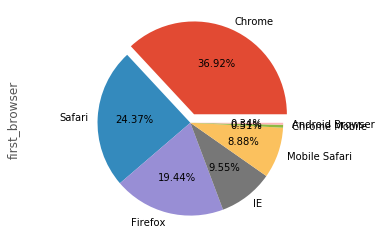

In [55]:
num = X.first_browser.value_counts() 
num = num[num>100]
number = (num/sum(pie_sa) * 100).round(decimals=2)
# The slices will be ordered and plotted counter-clockwise.
labels = num.index
sizes = number
explode = [0.1] + list(np.zeros(len(num)-1))
number.plot(kind='pie', fontsize=10, explode=explode, autopct='%.2f%%')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()


In [56]:
X.first_browser.isnull().sum()

7618

 - Preparation for Machine Learning 

Most of features are categorical variables except for age and signup_flow. Since Sklearn modual cannot handle categorical values, all the categorical values are undergone dummy operation in order to be transformed into numerical data.

In [151]:
cate_features = ['gender', 'signup_method', 'language', 'affiliate_channel',
                 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
                 'first_device_type']
len(cate_features)

8

In [ ]:
X.drop('first_browser', 1, inplace=True)

In [155]:
dum_X = pd.get_dummies(X, columns=cate_features, drop_first=True)
dum_X.head()
features_list = dum_X.columns
dum_X.shape

(88908, 69)

In [124]:
X_P = np.array(dum_X)
Y_P = np.array(Y)

In [125]:
#stratifiedShuffleSplit 
from sklearn.model_selection import StratifiedShuffleSplit 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X_P, Y_P):
    #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X_P[train_index], X_P[test_index]
     Y_train, Y_test = Y_P[train_index], Y_P[test_index]


    

In [156]:
# modify test dataset features
m_td = test_data
m_td.drop(['id','date_account_created','timestamp_first_active','date_first_booking','first_browser'], 1, inplace=True)

ValueError: labels ['id' 'date_account_created' 'timestamp_first_active' 'date_first_booking'] not contained in axis

In [157]:
m_td.shape
#X.shape

(62096, 11)

In [160]:
m_td.drop('first_browser', 1, inplace=True)

In [161]:
# modify age missing value
m_td.loc[m_td.age < 18, 'age'] = median
m_td.loc[m_td.age > 80, 'age'] = median
m_td.loc[m_td.age.isnull(), 'age'] = median
m_td.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type
0,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone
1,-unknown-,33.0,basic,0,en,direct,direct,untracked,Moweb,iPhone
2,-unknown-,33.0,basic,0,en,direct,direct,linked,Web,Windows Desktop
3,-unknown-,33.0,basic,0,en,direct,direct,linked,Web,Windows Desktop
4,-unknown-,33.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
classifiers = [
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    MultinomialNB(),
    #LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    #LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X_P, Y_P):
	X_train, X_test = X_P[train_index], Y_P[test_index]
	y_train, y_test = Y_P[train_index], Y_P[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] 
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")

In [65]:
# RandomForest 
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 1000)
clf_RF = clf_RF.fit(X_train, Y_train)
print "Random Forest Model Accuary: ", clf_RF.score(X_test, Y_test)


Random Forest Model Accuary:  0.662074007423


In [166]:
# Naive Bayes for sparse matrix
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_train, Y_train)
print "Naive Bayes Model Accuracy: ", clf_nb.score(X_test, Y_test)



Naive Bayes Model Accuracy:  0.698515352604
